

🎥 Recommended Video: [How Computer Vision Works | Artificial Intelligence and Machine Learning](https://www.youtube.com/watch?v=r_Q_-gf7bR4)

🎥 Optional: [But what is a convolution?](https://www.youtube.com/watch?v=KuXjwB4LzSA)

## **1. Image Classification with Convolutional Neural Networks (CNNs)**

### **1.1 What are CNNs?**
Suppose you are trying to identify a friend in a photo. Your brain instinctively focuses on facial features, edges, and shapes to make the connection. Convolutional Neural Networks (CNNs) operate on a similar principle, designed to process and understand images efficiently.

CNNs are a specialized type of neural network built to handle grid-like data, such as images. They excel at tasks like image classification, object detection, and segmentation by automatically learning spatial hierarchies of features.

### **1.2 Key Characteristics of CNNs**:

- **Local Receptive Fields**: Neurons focus on small regions of the input image, enabling them to detect local patterns such as edges and textures.

- **Weight Sharing**: A single set of weights (filters) is used across the image, reducing parameters and increasing efficiency.

- **Hierarchical Feature Learning**: Early layers capture simple features like edges, while deeper layers identify more complex patterns such as shapes and objects.


![Convolutional Neural Network](https://drive.google.com/uc?export=view&id=1aoAU6GmfXN5H8fRqCJLPee4HQqnOev_2)


---

### **1.3 CNN Architecture**
A typical CNN consists of the following layers:

#### **1.3.1 Convolution Layers**
Convolution layers extract features from images using convolution kernels, which act like high-tech magnifying glasses highlighting essential details. The process involves:
- **Kernel**: A matrix of values (e.g., 3x3) that scans the image.
- **Processing**: The kernel slides across the image, multiplying its values with the underlying pixel values, and produces a feature map highlighting specific patterns.

🎥 Optional: [Convolutional Neural Networks Explained (CNN Visualized)](https://www.youtube.com/watch?v=pj9-rr1wDhM)

#### **1.3.2 Pooling Layers**
Pooling layers simplify feature maps by reducing their dimensions while retaining critical information. This helps:
- Reduce computational load.
- Make the model more robust to slight variations in the input.

#### **1.3.3 Flattening**
After extracting features, the output is converted into a one-dimensional array, ready for classification.

#### **1.3.4 Dense Layers**
These fully connected layers take the flattened data and make predictions by learning intricate patterns between the extracted features.

In Summary:

- **Bottleneck Layers**: Convolution and pooling layers act as bottlenecks, reducing input dimensions and computational requirements.
- **Training Efficiency**: The filters in convolution layers begin with random values and are fine-tuned during training, akin to how weights in dense layers learn.

---

### 1.4 Convolution Layers

![Convolutional Layer](https://drive.google.com/uc?export=view&id=1DhIsye0SOXY4cl4AmJ0bY2Ji-BKq47He)

Convolution layers extract features from images using convolution kernels, similar to the techniques used in image editing tools like blurring, sharpening, and embossing. Here's a simplified process:

1. **Kernel**:
   - A kernel is a matrix of values, usually measuring 3 × 3, but it can be larger.
  
2. **Processing an Image**:
   - Place the kernel in the upper-left corner of the image.
   - Multiply the kernel values by the pixel values underneath.
   - Compute a new value for the center pixel by summing the products.
   - Move the kernel one pixel to the right and repeat the process.
   - Continue this process row by row and column by column until the entire image is processed.

A convolution layer uses many kernels, often 100 or more, to process images. These kernels are not predefined; they start with random values and are adjusted (learned) during the training of the Convolutional Neural Network (CNN), similar to how weights connecting neurons in dense layers are learned. Each kernel also has a bias associated with it, just like neurons in dense layers.

# Digit Recognition with Convolutional Neural Networks

The **MNIST dataset**, officially known as "The MNIST Database of Handwritten Digits," is a famous dataset used to train machine-learning models (and neural networks) to recognize handwritten digits. Each digit in the dataset consists of a 28x28 array of numbers representing pixel values from 0 to 255. In this example, we will use Keras to build and train a convolutional neural network (CNN) on the MNIST dataset. The dataset is included in Keras as a sample dataset, so we'll begin by loading it and examining its content and structure.

![](Images/mnist.png)

In [2]:
from keras.datasets import mnist

(train_images, y_train), (test_images, y_test) = mnist.load_data()
print(f'train_images: {train_images.shape}')
print(f'y_train: {y_train.shape}')
print(f'test_images: {test_images.shape}')
print(f'y_test: {y_test.shape}')

ModuleNotFoundError: No module named 'keras'

Plot the first 50 images and show the corresponding labels.

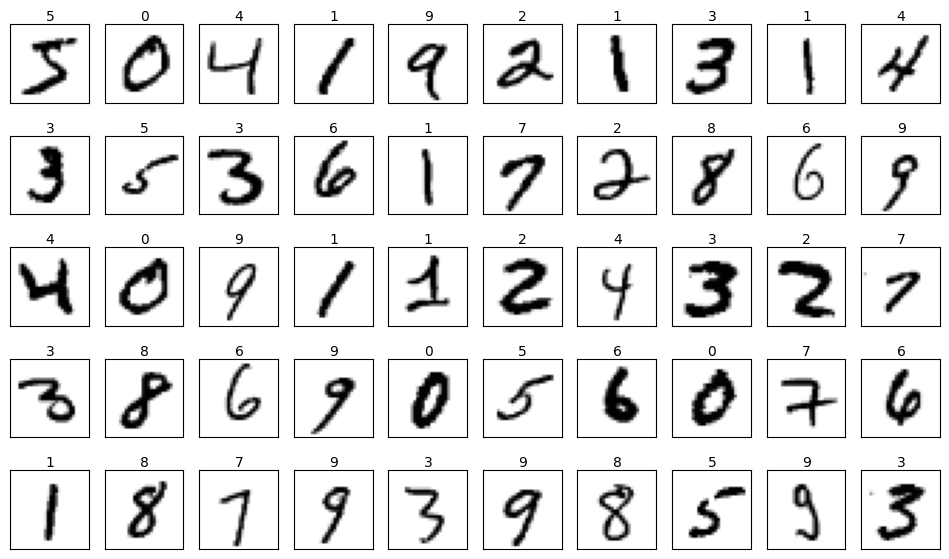

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(y_train[i]), transform=ax.transAxes)

Reshape the image data for input to a CNN and normalize the pixel values by dividing them by 255.

In [ ]:
x_train = train_images.reshape(60000, 28, 28, 1) / 255
x_test = test_images.reshape(10000, 28, 28, 1) / 255

Create a convolutional neural network with a `softmax` output layer for classification.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=80)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                   │ (None, 26, 26, 32)       │           320 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)      │ (None, 13, 13, 32)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)                 │ (None, 11, 11, 64)       │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)    │ (None, 5, 5, 64)         │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten (Flatten)                 │ (None, 1600)             │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                     │ (None, 128)              │       204,928 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 10)               │         1,290 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Call `fit` to train the model.

In [ ]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=50)

Epoch 1/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8923 - loss: 0.3471 - val_accuracy: 0.9833 - val_loss: 0.0504
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9844 - loss: 0.0519 - val_accuracy: 0.9890 - val_loss: 0.0371
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9892 - loss: 0.0333 - val_accuracy: 0.9897 - val_loss: 0.0310
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9928 - loss: 0.0221 - val_accuracy: 0.9900 - val_loss: 0.0303
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9945 - loss: 0.0161 - val_accuracy: 0.9911 - val_loss: 0.0271
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9963 - loss: 0.0125 - val_accuracy: 0.9893 - val_loss: 0.0313
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9976 - loss: 0.0081 - val_accuracy: 0.9916 - val_loss: 0.0291
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9973 - loss: 0.0078 - 

Plot the training and validation accuracy.

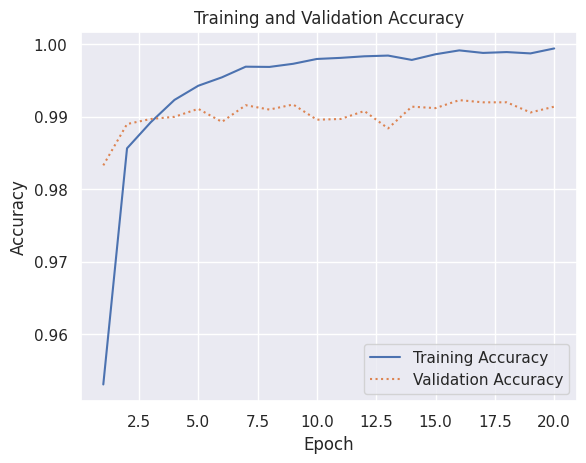

In [ ]:
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

How accurate is the model?

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {scores[1]:.1%}')

Accuracy: 99.1%


Show one of the test images.

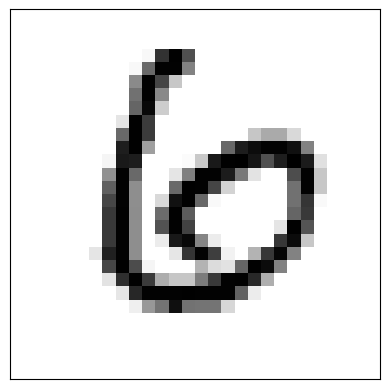

In [ ]:
sns.reset_orig()
test_image = test_images[11]
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(test_image, cmap=plt.cm.gray_r)

Use the test image to make a prediction.

In [ ]:
x = test_image.reshape(1, 28, 28, 1) / 255
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


array([[5.9814434e-15, 5.0411890e-29, 2.0916280e-28, 3.1852320e-27,
        1.4784823e-26, 4.9590522e-24, 1.0000000e+00, 3.2862159e-35,
        1.7686213e-18, 4.5592124e-32]], dtype=float32)

Get the predicted class.

In [ ]:
import numpy as np

predicted_class = np.argmax(model.predict(x), axis=1)[0]
print('Looks like a ' + str(predicted_class) + '!')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Looks like a 6!
